# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q="

In [ ]:
# Count every 50 city as 1 set 

# record_num = 0
# set_num = 1

# for city in cities:
#     if record_num<50:
#             record_num = record_num+1
#             print(f'Processing Record {record_num} of Set {set_num} | {city}')
#         else:
#             set_num = set_num+1
#             record_num = 0
        

In [ ]:
#Request max temp, humdity, windspeed etc. values of all cities from url and store them in a list to turn into dataframe later

# temp_list = []
# cloudiness_list = []
# windspeed_list = []
# humidity_list = []
# country_list = []
# dates_list = []
# lat_list = []
# lng_list = []
# maxtemp_list = []
# cities_list = []

# for city in cities[:5]:
#     response = requests.get(query_url + city).json()
# #     pprint(response)
#     try:
#         temp_list.append(response["main"]["temp"])
#         cloudiness_list.append(response["clouds"]["all"])
#         windspeed_list.append(response["wind"]["speed"])
#         humidity_list.append(response["main"]["humidity"])
#         country_list.append(response["sys"]["country"])
#         dates_list.append(response["dt"])
#         lat_list.append( response["coord"]["lat"])
#         lng_list.append(response["coord"]["lon"])
#         maxtemp_list.append(response["main"]["temp_max"])
#         cities_list.append(response["name"])
#     except:
#         print("error")

In [ ]:
# Combine counting every set of 50 cities & taking values from response: 
# It will count and print every city when counts&print all errors when trying to take and store values
# Both actions are taken in same for loop and prints huge amount of output of every city.

In [4]:
print("Beginning Data Retrieval")
print("-----------------------------")
temp_list = []
cloudiness_list = []
windspeed_list = []
humidity_list = []
country_list = []
dates_list = []
lat_list = []
lng_list = []
maxtemp_list = []
cities_list = []
record_num = 0
set_num = 1

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        humidity_list.append(response["main"]["humidity"])
        country_list.append(response["sys"]["country"])
        dates_list.append(response["dt"])
        lat_list.append( response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response["main"]["temp_max"])
        cities_list.append(response["name"])
        if record_num<50:
            record_num = record_num+1
            print(f'Processing Record {record_num} of Set {set_num} | {city}')
        else:
            set_num = set_num+1
            record_num = 0
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")
        

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | saint-maximin-la-sainte-baume
Processing Record 5 of Set 1 | aketi
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | vermilion
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | husavik
City not found. Skipping...
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | chabahar
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | nizwa
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | ayolas
Processing Record 21 of Set 1 | caravela

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
print(len(cloudiness_list))
print(len(windspeed_list))
print(len(humidity_list)) 
print(len(country_list)) 
print(len(dates_list)) 
print(len(lat_list)) 
print(len(lng_list)) 
print(len(maxtemp_list)) 
print(len(cities_list)) 

531
531
531
531
531
531
531
531
531


In [7]:
weather_data = pd.DataFrame({"City":cities_list, "Lat":lat_list, "Lng":lng_list, "Max Temp":maxtemp_list, "Humidity":humidity_list, 
                             "Cloudiness":cloudiness_list, "Wind Speed":windspeed_list, "Country":country_list, "Date":dates_list})


In [8]:
weather_data.count()

City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

In [10]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.45,-133.04,267.15,73,75,3.60,CA,1589408723
1,Hobart,-42.88,147.33,283.15,66,75,6.20,AU,1589408497
2,Albany,42.60,-73.97,287.59,18,1,3.58,US,1589408515
3,Saint-Maximin-la-Sainte-Baume,43.45,5.86,288.15,93,72,1.71,FR,1589408848
4,Aketi,2.74,23.78,296.93,75,87,0.59,CD,1589408848


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,5.310000e+02
mean,19.918870,17.191205,289.831375,69.802260,47.143126,3.487891,1.589409e+09
std,33.398913,91.188660,9.476135,22.631929,38.093062,2.376966,1.433785e+02
min,-54.800000,-179.170000,266.150000,3.000000,0.000000,0.350000,1.589408e+09
25%,-8.915000,-62.460000,283.360000,58.000000,5.000000,1.650000,1.589409e+09
50%,22.810000,19.930000,290.370000,76.000000,40.000000,2.720000,1.589409e+09
75%,47.460000,99.480000,298.160000,87.000000,84.500000,4.970000,1.589409e+09
max,78.220000,179.320000,307.150000,100.000000,100.000000,12.300000,1.589409e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
humidity_overhundred = weather_data.loc[weather_data['Humidity'] > 100]
humidity_overhundred.index

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
quartiles

In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

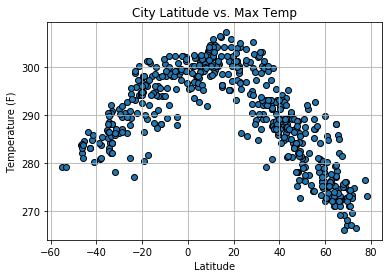

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Max Temp")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


## Latitude vs. Humidity Plot

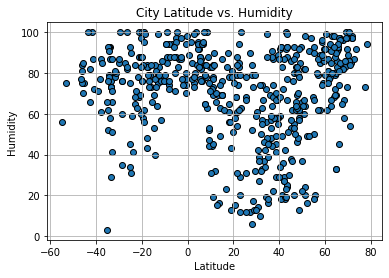

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


## Latitude vs. Cloudiness Plot

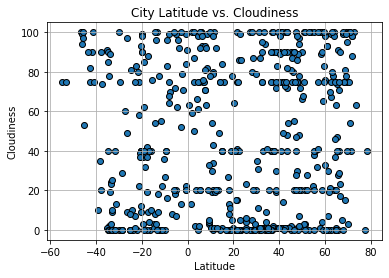

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


## Latitude vs. Wind Speed Plot

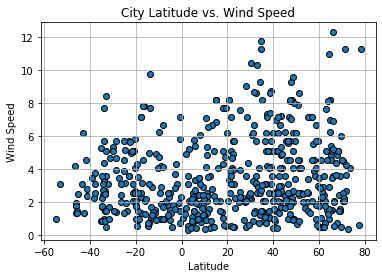

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern_data=weather_data.loc[weather_data['Lat'] > 0]
southern_data=weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the regression line is: y = -0.45x + 306.18


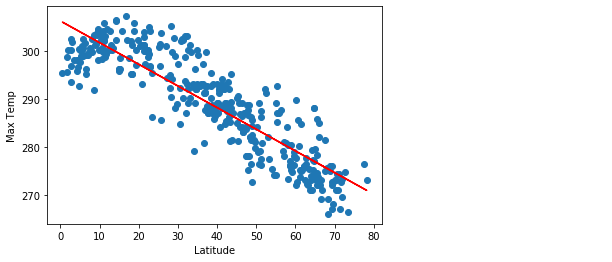

In [22]:
n_lat = northern_data["Lat"]
n_maxtemp = northern_data["Max Temp"]

x_values = n_lat
y_values = n_maxtemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,300),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The equation of the regression line is: {line_eq}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of the regression line is: y = -0.45x + 306.18


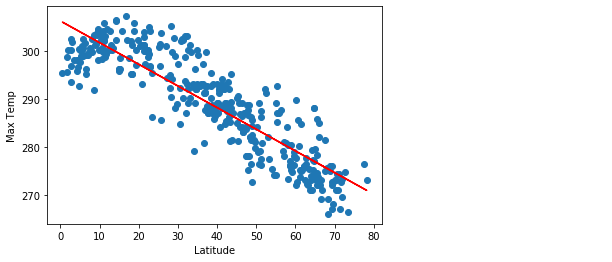

In [23]:
s_lat = northern_data["Lat"]
s_maxtemp = northern_data["Max Temp"]

x_values = s_lat
y_values = s_maxtemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,300),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The equation of the regression line is: {line_eq}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.16x + 60.67


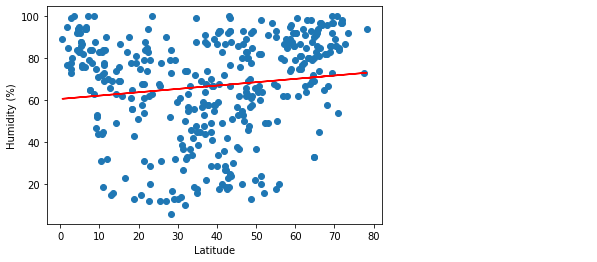

In [24]:
n_lat = northern_data["Lat"]
n_humidity = northern_data["Humidity"]

x_values = n_lat
y_values = n_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The equation of the regression line is: {line_eq}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.16x + 60.67


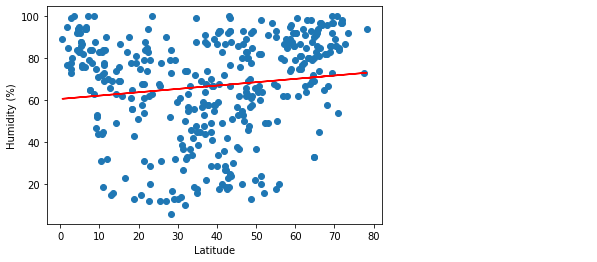

In [25]:
s_lat = northern_data["Lat"]
s_humidity = northern_data["Humidity"]

x_values = s_lat
y_values = s_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The equation of the regression line is: {line_eq}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.17x + 42.42


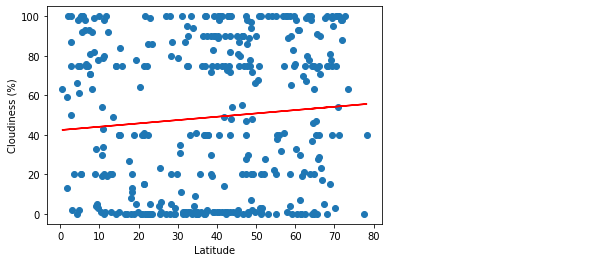

In [26]:
n_lat = northern_data["Lat"]
n_cloudiness = northern_data["Cloudiness"]

x_values = n_lat
y_values = n_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The equation of the regression line is: {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.17x + 42.42


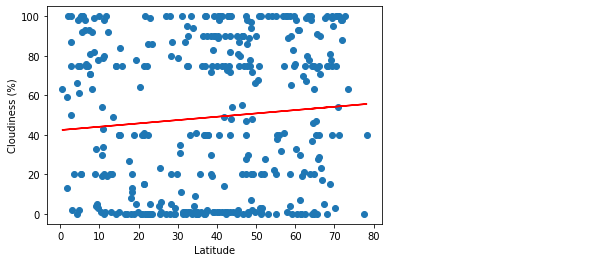

In [27]:
s_lat = northern_data["Lat"]
s_cloudiness = northern_data["Cloudiness"]

x_values = s_lat
y_values = s_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The equation of the regression line is: {line_eq}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.01x + 3.11


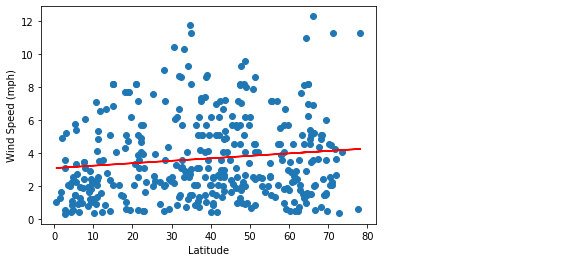

In [28]:
n_lat = northern_data["Lat"]
n_windspeed = northern_data["Wind Speed"]

x_values = n_lat
y_values = n_windspeed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The equation of the regression line is: {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.01x + 3.11


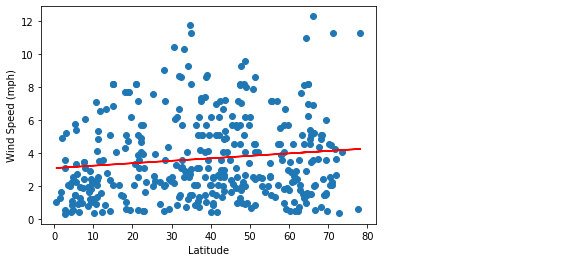

In [29]:
s_lat = northern_data["Lat"]
s_windspeed = northern_data["Wind Speed"]

x_values = s_lat
y_values = s_windspeed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The equation of the regression line is: {line_eq}")